<a href="https://colab.research.google.com/github/Hevensh/HvsPredictor/blob/main/predictable_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Test the predictability of Hevensh's New Loss Function

In [1]:
!git clone https://github.com/Hevensh/HvsPredictor.git

Cloning into 'HvsPredictor'...
remote: Enumerating objects: 117, done.
remote: Counting objects: 100% (117/117), done.
remote: Compressing objects: 100% (117/117), done.
remote: Total 117 (delta 59), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (117/117), 798.76 KiB | 2.74 MiB/s, done.
Resolving deltas: 100% (59/59), done.


In [2]:
import numpy as np
import IPython.display
import matplotlib.pyplot as plt
from HvsPredictor import MyPredictor as hvs

In [3]:
t = np.arange(0,5,0.01)
predictable = np.sin(t*np.pi*10)

In [4]:
np.random.seed(0)
noise = np.random.random_sample([500,])

In [5]:
noise_amp = 0.2
x = (1-noise_amp)/10*predictable + noise_amp/10*noise

In [6]:
md1 = hvs.MyPredictor(x)
md1.deTrend()
md1.Options_set()
md1.compile_and_fit()
IPython.display.clear_output()

In [7]:
md2 = hvs.MyPredictor(x)
md2.deTrend()
md2.Options_set(loss_func='mse')
md2.compile_and_fit()
IPython.display.clear_output()

The model uses <HvsPredictor.MyPredictor.CautiousLoss object at 0x7f0c6d304990>
MSE on test set is 6.213045183126078e-05

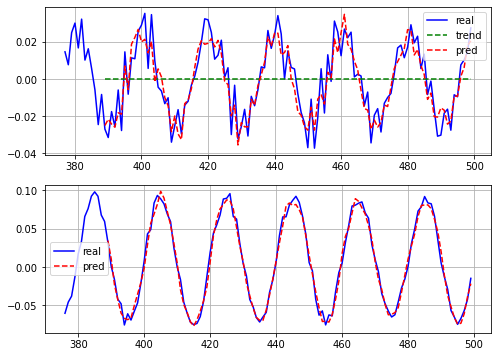

In [8]:
md1.result_plot()
md1

The model uses mse
MSE on test set is 6.695710611950648e-05

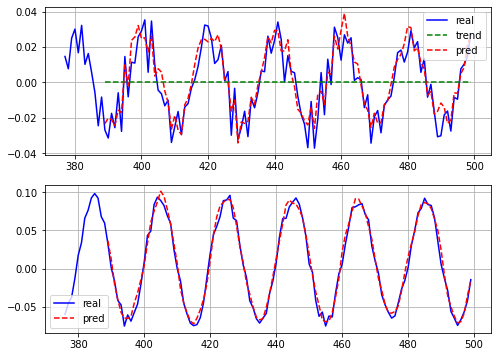

In [9]:
md2.result_plot()
md2

In [10]:
md1.metrics = 'profit'
md1.profit()
md1

The model uses <HvsPredictor.MyPredictor.CautiousLoss object at 0x7f0c6d304990>
Backtest from date 389
Total profit is : 362.3656%
Daily profit is : 3.2646%
Maximum drawdown is : -0.4658%

In [11]:
md2.metrics = 'profit'
md2.profit()
md2

The model uses mse
Backtest from date 389
Total profit is : 378.7035%
Daily profit is : 3.4117%
Maximum drawdown is : -0.7131%